In [2]:
import numpy as np
import pandas as pd
import pickle

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)


In [3]:
movies = pd.read_csv('/Users/yugjain/Documents/Machine_learning/Movies/datasets/processed/movies_cleaned.csv')
ratings = pd.read_csv('/Users/yugjain/Documents/Machine_learning/Movies/datasets/processed/ratings_cleaned.csv')
genre_matrix=pd.read_csv('/Users/yugjain/Documents/Machine_learning/Movies/datasets/processed/genre_matrix.csv')

print(f"Movies loaded : {len(movies)}")
print(f"ratings : {len(ratings)}")
print(f"genre matrix shape : {genre_matrix.shape}")

print("\nsample movies")
display(movies.head(10))

print("\nsample genre matrix")
display(genre_matrix.head(10))

Movies loaded : 9391
ratings : 2487172
genre matrix shape : (9391, 20)

sample movies


,Unnamed: 0,movieId,title,genres
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,2,Jumanji (1995),Adventure|Children|Fantasy
2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,4,5,Father of the Bride Part II (1995),Comedy
5,5,6,Heat (1995),Action|Crime|Thriller
6,6,7,Sabrina (1995),Comedy|Romance
7,7,8,Tom and Huck (1995),Adventure|Children
8,8,9,Sudden Death (1995),Action
9,9,10,GoldenEye (1995),Action|Adventure|Thriller



sample genre matrix


,movieId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,8,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [4]:
movies = pd.read_csv('/Users/yugjain/Documents/Machine_learning/Movies/datasets/processed/movies_cleaned.csv')
ratings = pd.read_csv('/Users/yugjain/Documents/Machine_learning/Movies/datasets/processed/ratings_cleaned.csv')
genre_matrix = pd.read_csv('/Users/yugjain/Documents/Machine_learning/Movies/datasets/processed/genre_matrix.csv', index_col=0)

# Load the REBUILT similarity matrix
with open('/Users/yugjain/Documents/Machine_learning/Movies/models/content_similarity_matrix.pkl', 'rb') as f:
    similarity_df = pickle.load(f)

print(f"Movies loaded: {len(movies)}")
print(f"Ratings loaded: {len(ratings)}")
print(f"Genre matrix shape: {genre_matrix.shape}")
print(f"Similarity matrix shape: {similarity_df.shape}")

# Verify consistency
print(f"\nConsistency check:")
print(f"  Movies in movies_clean: {len(movies)}")
print(f"  Movies in similarity_df: {len(similarity_df)}")
print(f"  Match: {len(movies) == len(similarity_df)}")

Movies loaded: 9391
Ratings loaded: 2487172
Genre matrix shape: (9391, 19)
Similarity matrix shape: (9391, 9391)

Consistency check:
  Movies in movies_clean: 9391
  Movies in similarity_df: 9391
  Match: True


In [5]:
print("content based Filtering Concept")
print("*"*50)
print("If you like 'The dark knight' (Action|Crime|Drama)")
print("so we recommend the movies with similar genres: ")
print(" - Action movies")
print(" - Crime movies")
print(" - Drama movies")
print('\nWe measure similarity using genre overlap')
print("*"*50)


content based Filtering Concept
**************************************************
If you like 'The dark knight' (Action|Crime|Drama)
so we recommend the movies with similar genres: 
 - Action movies
 - Crime movies
 - Drama movies

We measure similarity using genre overlap
**************************************************


In [6]:
movies_features=movies[['movieId','title','genres']].copy()

movies_features=movies_features.set_index('movieId')

print("Movies features prepared")
print(f"Movies : {len(movies_features)}")
print(f"genre features : {genre_matrix.shape[1]}")

print("\nexample movies with genre features: ")
sample_movie_id=movies_features.index[0]
print(f"Movies: {movies_features.loc[sample_movie_id,'title']}")
print(f"Genres : {movies_features.loc[sample_movie_id,'genres']}")
print("\n genre vector")
print(genre_matrix.loc[sample_movie_id])


Movies features prepared
Movies : 9391
genre features : 19

example movies with genre features: 
Movies: Toy Story (1995)
Genres : Adventure|Animation|Children|Comedy|Fantasy

 genre vector
Action         0
Adventure      1
Animation      1
Children       1
Comedy         1
Crime          0
Documentary    0
Drama          0
Fantasy        1
Film-Noir      0
Horror         0
IMAX           0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
Name: 1, dtype: int64


In [8]:
#calculate the similarity matrix
print("calculating cosine similarity between the all movies ")
similarity_matrix=cosine_similarity(genre_matrix)

similarity_df=pd.DataFrame(similarity_matrix,index=genre_matrix.index,columns=genre_matrix.index)

print(f"\nSimilarity matrix shape : {similarity_df.shape}")
print(f"Memory usage : {similarity_df.memory_usage(deep=True).sum()/1024**2:.2f}MB")

print("sample Similarities")
print("(1.0=identical, 0.0=completely different)")
display(similarity_df.iloc[:5,:5])



calculating cosine similarity between the all movies 

Similarity matrix shape : (9391, 9391)
Memory usage : 673.17MB
sample Similarities
(1.0=identical, 0.0=completely different)


movieId,1,2,3,4,5
movieId,,,,,
1,1.000000,0.774597,0.316228,0.258199,0.447214
2,0.774597,1.000000,0.000000,0.000000,0.000000
3,0.316228,0.000000,1.000000,0.816497,0.707107
4,0.258199,0.000000,0.816497,1.000000,0.577350
5,0.447214,0.000000,0.707107,0.577350,1.000000


In [9]:
#Now need to understand the cosine similarity
example_movie="Toy Story (1995)"

example_movie_id=movies[movies['title']==example_movie]['movieId'].values[0]

example_genre=movies[movies['title']==example_movie]['genres'].values[0]

print(f"Example : {example_movie}")
print(f"MoviesId :{example_movie_id}")
print(f"Genres : {example_genre}")

example_similarities=similarity_df.loc[example_movie_id].sort_values(ascending = False)

print(f"\nTop 10 most similar movies to {example_movie}")
for i, (movie_id,similarity) in enumerate (example_similarities.head(10).items(),1):
    # Check if the movie_id exists in the movies DataFrame
    movie_data = movies[movies['movieId']==movie_id]
    if len(movie_data) > 0:
        movie_title = movie_data['title'].values[0]
        movie_genres = movie_data['genres'].values[0]

        print(f"{i}.{movie_title}")
        print(f" genre :{movie_genres}")
        print(f" similarity : {similarity:.4f}\n")
    else:
        print(f"{i}. Movie ID {movie_id} not found in the dataset")
        print(f" similarity : {similarity:.4f}\n")




Example : Toy Story (1995)
MoviesId :1
Genres : Adventure|Animation|Children|Comedy|Fantasy

Top 10 most similar movies to Toy Story (1995)
1.Toy Story (1995)
 genre :Adventure|Animation|Children|Comedy|Fantasy
 similarity : 1.0000

2.Tale of Despereaux, The (2008)
 genre :Adventure|Animation|Children|Comedy|Fantasy
 similarity : 1.0000

3.DuckTales: The Movie - Treasure of the Lost Lamp (1990)
 genre :Adventure|Animation|Children|Comedy|Fantasy
 similarity : 1.0000

4.Turbo (2013)
 genre :Adventure|Animation|Children|Comedy|Fantasy
 similarity : 1.0000

5.Monsters, Inc. (2001)
 genre :Adventure|Animation|Children|Comedy|Fantasy
 similarity : 1.0000

6.Antz (1998)
 genre :Adventure|Animation|Children|Comedy|Fantasy
 similarity : 1.0000

7.Emperor's New Groove, The (2000)
 genre :Adventure|Animation|Children|Comedy|Fantasy
 similarity : 1.0000

8.Shrek the Third (2007)
 genre :Adventure|Animation|Children|Comedy|Fantasy
 similarity : 1.0000

9.Adventures of Rocky and Bullwinkle, The (20

In [10]:
#build recomendtion function
def get_content_recommendations(movie_title, n_recommendations=20):
    movie_match=movies[movies['title']==movie_title]
    if len(movie_match)==0:
        print(f"movie '{movie_title}' not found")
        print("try search with partial title")
        partial_matches=movies[movies['title'].str.contains(movie_title,case=False,na=False)]
        if len(partial_matches)>0:
            print("\nDid you mean one of these ?")
            print(partial_matches[['title','genres']].head(10))
        return None

    movie_id=movie_match['movieId'].values[0]
    movie_genre=movie_match['genres'].values[0]

    print(f"Finding Recommendation for : {movie_title}")
    print(f"Genre: {movie_genre}\n")

    similar_scores= similarity_df.loc[movie_id].sort_values(ascending=False)

    similar_scores=similar_scores[similar_scores.index != movie_id]

    top_similar = similar_scores.head(n_recommendations)


    #create recommendation dataframe
    recommendations=[]
    for rec_movie_id, similarity_score in top_similar.items():
        movie_info = movies[movies['movieId'] == rec_movie_id]

        if len(movie_info) == 0:
            continue

        movie_info = movie_info.iloc[0]

        recommendations.append({
            'movieId':movie_id,
            'title':movie_info['title'],
            'genres':movie_info['genres'],
            'similarity_score':similarity_score
        })

    recommendations_df = pd.DataFrame(recommendations)
    return recommendations_df

print("**"*30)
recommendations= get_content_recommendations("Toy Story (1995)",n_recommendations=20)
if recommendations is not None:
    display(recommendations)


************************************************************
Finding Recommendation for : Toy Story (1995)
Genre: Adventure|Animation|Children|Comedy|Fantasy



,movieId,title,genres,similarity_score
0,1,"Tale of Despereaux, The (2008)",Adventure|Animation|Children|Comedy|Fantasy,1.000000
1,1,DuckTales: The Movie - Treasure of the Lost Lamp (1990),Adventure|Animation|Children|Comedy|Fantasy,1.000000
2,1,Turbo (2013),Adventure|Animation|Children|Comedy|Fantasy,1.000000
3,1,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy,1.000000
4,1,Antz (1998),Adventure|Animation|Children|Comedy|Fantasy,1.000000
5,1,"Emperor's New Groove, The (2000)",Adventure|Animation|Children|Comedy|Fantasy,1.000000
6,1,Shrek the Third (2007),Adventure|Animation|Children|Comedy|Fantasy,1.000000
7,1,"Adventures of Rocky and Bullwinkle, The (2000)",Adventure|Animation|Children|Comedy|Fantasy,1.000000
8,1,"Wild, The (2006)",Adventure|Animation|Children|Comedy|Fantasy,1.000000
9,1,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,1.000000


In [11]:
# enhance the recommendation function by using popularity


def get_movie_recommendations_with_popularity(movie_title,n_recommendations=10,min_ratings=20):

    movie_match = movies[movies['title']==movie_title]
    if len(movie_match)==0:
        print(f"Movie '{movie_title}' not found")
        return None
    movie_id=movie_match['movieId'].values[0]
    movie_genres=movie_match['genres'].values[0]

    print(f"finding recommendations for : {movie_title}")
    print(f"genres : {movie_genres}")

    movie_popularity=ratings.groupby('movieId').size().reset_index(name='num_ratings')

    similar_scores=similarity_df.loc[movie_id].sort_values(ascending=False)
    similar_scores = similar_scores[similar_scores.index!=movie_id]

    top_candidate=similar_scores.head(n_recommendations * 3)
    recommendations =[]
    for candidate_id, similarity_score in top_candidate.items():
        # ✓ ADD THIS CHECK
        movie_info_df = movies[movies['movieId'] == candidate_id]

        if len(movie_info_df) == 0:  # ✓ Skip if movie not found
            continue

        movie_info = movie_info_df.iloc[0]  # ✓ Now safe to use
        popularity_info = movie_popularity[movie_popularity['movieId'] == candidate_id]

        num_ratings = popularity_info['num_ratings'].values[0] if len(popularity_info) > 0 else 0
        if num_ratings>=min_ratings:
            recommendations.append({
                'movieId': candidate_id,
                'title': movie_info['title'],
                'genres':movie_info['genres'],
                'similarity_score':similarity_score,
                'num_ratings':num_ratings

            })

    recommendations_df=pd.DataFrame(recommendations)

    recommendations_df= recommendations_df.head(n_recommendations)

    return recommendations_df

print("*"*50)
recommendations_pop = get_movie_recommendations_with_popularity("Toy Story (1995)",n_recommendations=10,min_ratings=50)
if recommendations_pop is not None:
    display(recommendations_pop)


**************************************************
finding recommendations for : Toy Story (1995)
genres : Adventure|Animation|Children|Comedy|Fantasy


,movieId,title,genres,similarity_score,num_ratings
0,4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy,1.000000,2908
1,2294,Antz (1998),Adventure|Animation|Children|Comedy|Fantasy,1.000000,1275
2,4016,"Emperor's New Groove, The (2000)",Adventure|Animation|Children|Comedy|Fantasy,1.000000,724
3,53121,Shrek the Third (2007),Adventure|Animation|Children|Comedy|Fantasy,1.000000,289
4,3754,"Adventures of Rocky and Bullwinkle, The (2000)",Adventure|Animation|Children|Comedy|Fantasy,1.000000,181
5,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,1.000000,2795
6,51939,TMNT (Teenage Mutant Ninja Turtles) (2007),Action|Adventure|Animation|Children|Comedy|Fantasy,0.912871,64
7,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,0.912871,719
8,4306,Shrek (2001),Adventure|Animation|Children|Comedy|Fantasy|Romance,0.912871,3994
9,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sci-Fi,0.912871,1256


In [12]:
def get_content_recommendations_with_rating(movie_title, n_recommendation=10, min_ratings=20):

    movie_match = movies[movies['title'] == movie_title]

    if len(movie_match) == 0:
        print(f"Movie '{movie_title}' not found")
        return None

    movie_id = movie_match['movieId'].values[0]
    movie_genres = movie_match['genres'].values[0]

    print(f"Finding recommendation for: {movie_title}")
    print(f"Genre: {movie_genres}\n")

    # ✓ CHECK if movieId exists in similarity matrix
    if movie_id not in similarity_df.index:
        print(f"Error: Movie ID {movie_id} not found in similarity matrix")
        print("This movie might have been filtered during preprocessing")
        return None

    movie_stats = ratings.groupby('movieId').agg({'rating': ['mean', 'count']}).reset_index()
    movie_stats.columns = ['movieId', 'avg_rating', 'num_ratings']

    similar_scores = similarity_df.loc[movie_id].sort_values(ascending=False)
    similar_scores = similar_scores[similar_scores.index != movie_id]

    top_candidates = similar_scores.head(n_recommendation * 3)

    recommendations = []
    for candidate_id, similarity_score in top_candidates.items():  # ✓ Fixed variable name
        # ✓ Check if movie exists
        movie_info_df = movies[movies['movieId'] == candidate_id]

        if len(movie_info_df) == 0:
            continue

        movie_info = movie_info_df.iloc[0]
        stats_info = movie_stats[movie_stats['movieId'] == candidate_id]

        if len(stats_info) > 0:
            avg_rating = stats_info['avg_rating'].values[0]
            num_ratings = stats_info['num_ratings'].values[0]

            if num_ratings >= min_ratings:
                recommendations.append({
                    'movieId': candidate_id,
                    'title': movie_info['title'],
                    'genres': movie_info['genres'],
                    'similarity_score': similarity_score,  # ✓ Fixed variable name
                    'avg_rating': round(avg_rating, 2),
                    'num_ratings': int(num_ratings)
                })

    recommendations_df = pd.DataFrame(recommendations)

    # Sort by similarity, then by rating
    recommendations_df = recommendations_df.sort_values(['similarity_score', 'avg_rating'],
                                                        ascending=[False, False])
    recommendations_df = recommendations_df.head(n_recommendation)

    return recommendations_df


# Test
print("=" * 70)
recommendations_rating = get_content_recommendations_with_rating("Inception (2010)",
                                                                  n_recommendation=10,
                                                                  min_ratings=50)
if recommendations_rating is not None:
    display(recommendations_rating)



Finding recommendation for: Inception (2010)
Genre: Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX



,movieId,title,genres,similarity_score,avg_rating,num_ratings
0,60684,Watchmen (2009),Action|Drama|Mystery|Sci-Fi|Thriller|IMAX,0.925820,3.73,677
1,198,Strange Days (1995),Action|Crime|Drama|Mystery|Sci-Fi|Thriller,0.925820,3.41,1175
11,85414,Source Code (2011),Action|Drama|Mystery|Sci-Fi|Thriller,0.845154,3.79,407
7,7445,Man on Fire (2004),Action|Crime|Drama|Mystery|Thriller,0.845154,3.77,607
12,74510,"Girl Who Played with Fire, The (Flickan som lekte med elden) (2009)",Action|Crime|Drama|Mystery|Thriller,0.845154,3.76,119
6,5445,Minority Report (2002),Action|Crime|Mystery|Sci-Fi|Thriller,0.845154,3.66,2920
2,2058,"Negotiator, The (1998)",Action|Crime|Drama|Mystery|Thriller,0.845154,3.57,1071
3,5388,Insomnia (2002),Action|Crime|Drama|Mystery|Thriller,0.845154,3.47,761
5,86644,"Fast Five (Fast and the Furious 5, The) (2011)",Action|Crime|Drama|Thriller|IMAX,0.845154,3.47,74
9,1909,"X-Files: Fight the Future, The (1998)",Action|Crime|Mystery|Sci-Fi|Thriller,0.845154,3.32,1484


In [13]:
def search_movies(query, n_results=10):
   # Case-insensitive search
    matches = movies[movies['title'].str.contains(query, case=False, na=False)]

    if len(matches) == 0:
        print(f"No movies found matching '{query}'")
        return None

    # Add rating count and average rating
    movie_stats = ratings.groupby('movieId').agg({
        'rating': ['mean', 'count']
    }).reset_index()
    movie_stats.columns = ['movieId', 'avg_rating', 'num_ratings']

    results = matches.merge(movie_stats, on='movieId', how='left')
    results = results[['movieId', 'title', 'genres', 'avg_rating', 'num_ratings']]
    results = results.sort_values('num_ratings', ascending=False).head(n_results)

    return results

# Test search function
print("Search examples:")
print("\n1. Searching for 'batman':")
display(search_movies("batman", n_results=5))

print("\n2. Searching for 'star wars':")
display(search_movies("star wars", n_results=5))


Search examples:

1. Searching for 'batman':


,movieId,title,genres,avg_rating,num_ratings
1,592,Batman (1989),Action|Crime|Thriller,3.407700,5753
0,153,Batman Forever (1995),Action|Adventure|Comedy|Crime,2.904444,4050
7,33794,Batman Begins (2005),Action|Crime|IMAX,3.961325,2340
2,1377,Batman Returns (1992),Action|Crime,3.119477,1607
3,1562,Batman & Robin (1997),Action|Adventure|Fantasy|Thriller,2.196365,1128



2. Searching for 'star wars':


,movieId,title,genres,avg_rating,num_ratings
0,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.186157,6841
2,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,3.991617,5845
1,1196,Star Wars: Episode V - The Empire Strikes Back (1980),Action|Adventure|Sci-Fi,4.170638,5708
3,2628,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi,3.062449,3699
4,5378,Star Wars: Episode II - Attack of the Clones (2002),Action|Adventure|Sci-Fi|IMAX,3.116980,2073


In [14]:
#test
test_movies=[
    "Toy Story (1995)",
    "The Matrix (1999)",
    "Titanic (1997)"
    "The Godfather (1972)"
    "Finding Neno (2003)"
]

for i in test_movies:
    rec=get_content_recommendations_with_rating(i,n_recommendation=5,min_ratings=30)
    if rec is not None:
        display(rec)
    else:
        print(f"Could not generate recommendations for {test_movies}")

Finding recommendation for: Toy Story (1995)
Genre: Adventure|Animation|Children|Comedy|Fantasy



,movieId,title,genres,similarity_score,avg_rating,num_ratings
1,4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy,1.0,3.88,2908
6,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,1.0,3.84,2795
3,4016,"Emperor's New Groove, The (2000)",Adventure|Animation|Children|Comedy|Fantasy,1.0,3.62,724
2,2294,Antz (1998),Adventure|Animation|Children|Comedy|Fantasy,1.0,3.34,1275
4,53121,Shrek the Third (2007),Adventure|Animation|Children|Comedy|Fantasy,1.0,3.13,289


Movie 'The Matrix (1999)' not found
Could not generate recommendations for ['Toy Story (1995)', 'The Matrix (1999)', 'Titanic (1997)The Godfather (1972)Finding Neno (2003)']
Movie 'Titanic (1997)The Godfather (1972)Finding Neno (2003)' not found
Could not generate recommendations for ['Toy Story (1995)', 'The Matrix (1999)', 'Titanic (1997)The Godfather (1972)Finding Neno (2003)']



 Genre insights :
Action: 1570movies
Adventure: 1089movies
Animation: 386movies
Children: 576movies
Comedy: 3384movies
Crime: 1147movies
Documentary: 418movies
Drama: 4587movies
Fantasy: 653movies
Film-Noir: 105movies
Horror: 919movies
IMAX: 157movies
Musical: 368movies
Mystery: 570movies
Romance: 1638movies
Sci-Fi: 826movies
Thriller: 1835movies
War: 415movies
Western: 198movies


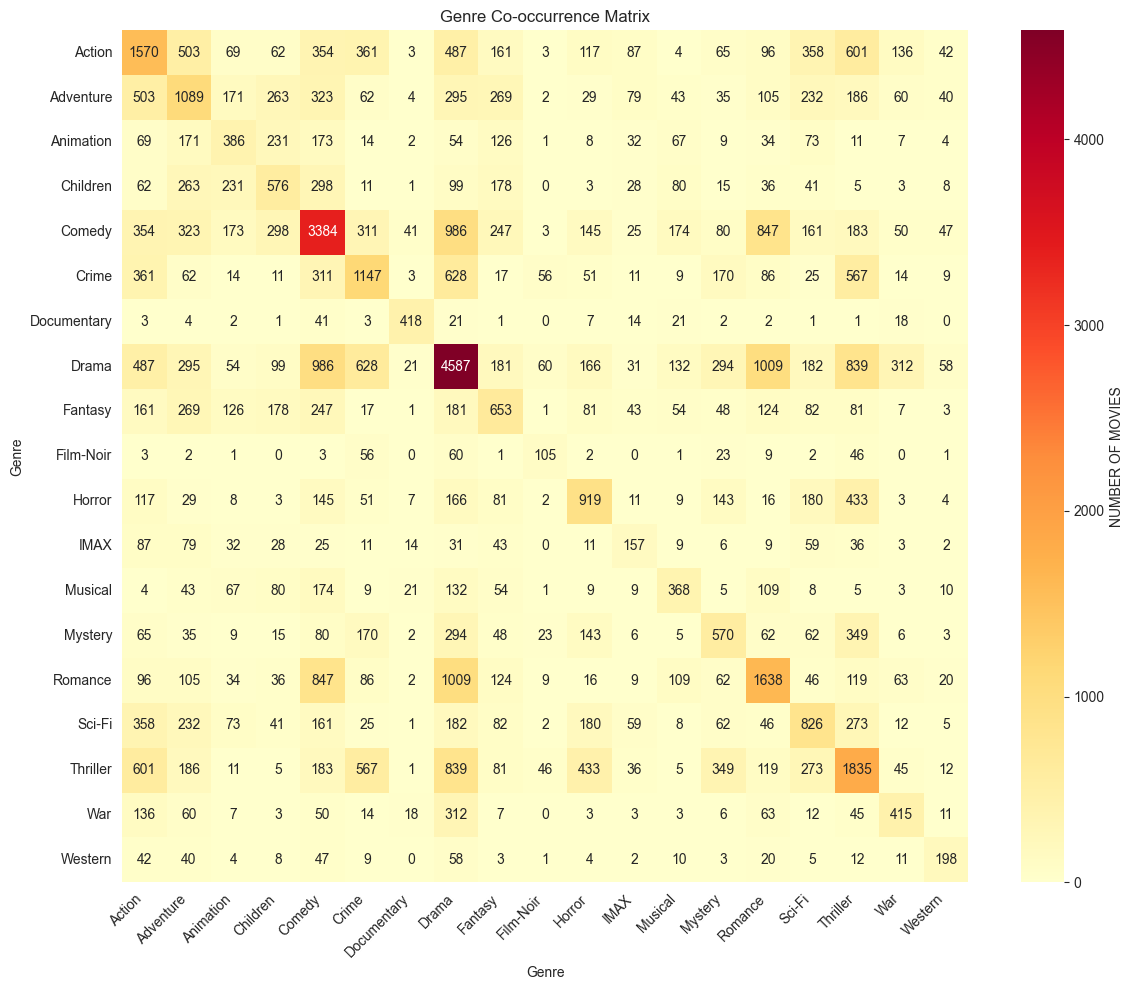

In [15]:
#visualize the genre overlap

import matplotlib.pyplot as plt
import seaborn as sns

genre_names= genre_matrix.columns.tolist()
n_genre=len(genre_names)

coccurrence=np.zeros((n_genre,n_genre))

for i, genre1 in enumerate(genre_names):
    for j, genre2 in enumerate(genre_names):
        coccurrence[i,j]=((genre_matrix[genre1]==1) & (genre_matrix[genre2] ==1)).sum()

plt.figure(figsize=(12,10))
sns.heatmap(coccurrence,xticklabels=genre_names,yticklabels=genre_names,cmap='YlOrRd',annot=True,fmt='.0f',cbar_kws={'label' : 'NUMBER OF MOVIES'})
plt.title('Genre Co-occurrence Matrix')
plt.xlabel('Genre')
plt.ylabel('Genre')
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('/Users/yugjain/Documents/Machine_learning/Movies/visualization/genre_coccurrence.png',dpi=150,bbox_inches='tight')

print("\n Genre insights :")
for i, genre in enumerate(genre_names):
    print(f"{genre}: {int(coccurrence[i,i])}movies")


In [20]:
#evaluate the recommendation quality

def evaluate_recommendations(movie_title,n_recs=10):
    recs= get_content_recommendations_with_rating(movie_title,n_recommendation=n_recs)

    if recs is None:
        return

    original_genres=movies[movies['title']==movie_title]['genres'].values[0]
    original_genre_set=set(original_genres.split('|'))

    print(f"Original moive genre : {original_genres}")
    print(f"checking genre overlap in recommedation")

    for idx, row in recs.iterrows():
        rec_genres =set(row['genres'].split('|'))
        overlap= original_genre_set.intersection(rec_genres)
        overlap_perct = len(overlap)/len(original_genre_set)*100

        print(f"{row['title']}")
        print(f" Genres : {row['genres']}")
        print(f"overlap : {overlap} ({overlap_perct:.0f}%")
        print(f" similarity : {row['similarity_score']:.3f}\n")

evaluate_recommendations("Inception (2010)", n_recs=5)


Finding recommendation for: Inception (2010)
Genre: Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX

Original moive genre : Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
checking genre overlap in recommedation
Watchmen (2009)
 Genres : Action|Drama|Mystery|Sci-Fi|Thriller|IMAX
overlap : {'Mystery', 'Sci-Fi', 'Drama', 'IMAX', 'Action', 'Thriller'} (86%
 similarity : 0.926

Strange Days (1995)
 Genres : Action|Crime|Drama|Mystery|Sci-Fi|Thriller
overlap : {'Crime', 'Mystery', 'Sci-Fi', 'Drama', 'Action', 'Thriller'} (86%
 similarity : 0.926

Source Code (2011)
 Genres : Action|Drama|Mystery|Sci-Fi|Thriller
overlap : {'Mystery', 'Sci-Fi', 'Drama', 'Action', 'Thriller'} (71%
 similarity : 0.845

Man on Fire (2004)
 Genres : Action|Crime|Drama|Mystery|Thriller
overlap : {'Crime', 'Mystery', 'Drama', 'Action', 'Thriller'} (71%
 similarity : 0.845

Girl Who Played with Fire, The (Flickan som lekte med elden) (2009)
 Genres : Action|Crime|Drama|Mystery|Thriller
overlap : {'Crime', 'Mystery',

In [21]:
print("=" * 70)
print("CONTENT-BASED RECOMMENDATION SYSTEM - SUMMARY")
print("=" * 70)

print("\nHow it works:")
print("  1. Represents each movie as a vector of genres (binary)")
print("  2. Calculates cosine similarity between all movies")
print("  3. Recommends movies with highest similarity scores")

print(f"\nDataset:")
print(f"  - Total movies: {len(movies):,}")
print(f"  - Total genres: {len(genre_matrix.columns)}")
print(f"  - Similarity matrix size: {similarity_df.shape}")

print(f"\nStrengths:")
print("  ✓ No cold-start problem for new users")
print("  ✓ Transparent - we know WHY movies are recommended")
print("  ✓ Works well for users with clear genre preferences")

print(f"\nLimitations:")
print("  ✗ Only considers genres (ignores actors, directors, plot)")
print("  ✗ Can't discover movies outside user's genre preferences")
print("  ✗ Recommendations can be too similar (filter bubble)")

print(f"\nFunctions available:")
print("  - search_movies(query) - Find movies by title")
print("  - get_content_recommendations(title, n) - Basic recommendations")
print("  - get_content_recommendations_with_rating(title, n) - With quality filter")

print("\n" + "=" * 70)
print("Next: Build Collaborative Filtering in 04_collaborative_filtering.ipynb")
print("=" * 70)

CONTENT-BASED RECOMMENDATION SYSTEM - SUMMARY

How it works:
  1. Represents each movie as a vector of genres (binary)
  2. Calculates cosine similarity between all movies
  3. Recommends movies with highest similarity scores

Dataset:
  - Total movies: 9,391
  - Total genres: 19
  - Similarity matrix size: (9391, 9391)

Strengths:
  ✓ No cold-start problem for new users
  ✓ Transparent - we know WHY movies are recommended
  ✓ Works well for users with clear genre preferences

Limitations:
  ✗ Only considers genres (ignores actors, directors, plot)
  ✗ Can't discover movies outside user's genre preferences
  ✗ Recommendations can be too similar (filter bubble)

Functions available:
  - search_movies(query) - Find movies by title
  - get_content_recommendations(title, n) - Basic recommendations
  - get_content_recommendations_with_rating(title, n) - With quality filter

Next: Build Collaborative Filtering in 04_collaborative_filtering.ipynb


In [26]:
# Try your own recommendations!
print("Try getting recommendations for your favorite movie:\n")

# Example usage
my_movie = "Toy Story (1995)"  # Change this to any movie

print(f"Getting recommendations for: {my_movie}\n")
my_recs = get_content_recommendations_with_rating(my_movie, n_recommendation=10, min_ratings=50)

if my_recs is not None:
    display(my_recs)

# Save these recommendations
if my_recs is not None:
    my_recs.to_csv('content_based_example.csv', index=False)
    print("\n✓ Recommendations saved to results/recommendations/content_based_example.csv")

Try getting recommendations for your favorite movie:

Getting recommendations for: Toy Story (1995)

Finding recommendation for: Toy Story (1995)
Genre: Adventure|Animation|Children|Comedy|Fantasy



,movieId,title,genres,similarity_score,avg_rating,num_ratings
0,4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy,1.000000,3.88,2908
5,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,1.000000,3.84,2795
2,4016,"Emperor's New Groove, The (2000)",Adventure|Animation|Children|Comedy|Fantasy,1.000000,3.62,724
1,2294,Antz (1998),Adventure|Animation|Children|Comedy|Fantasy,1.000000,3.34,1275
3,53121,Shrek the Third (2007),Adventure|Animation|Children|Comedy|Fantasy,1.000000,3.13,289
4,3754,"Adventures of Rocky and Bullwinkle, The (2000)",Adventure|Animation|Children|Comedy|Fantasy,1.000000,2.20,181
7,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,0.912871,4.02,719
8,4306,Shrek (2001),Adventure|Animation|Children|Comedy|Fantasy|Romance,0.912871,3.83,3994
10,108932,The Lego Movie (2014),Action|Adventure|Animation|Children|Comedy|Fantasy,0.912871,3.71,163
11,78637,Shrek Forever After (a.k.a. Shrek: The Final Chapter) (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,0.912871,3.32,93



✓ Recommendations saved to results/recommendations/content_based_example.csv
